In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.layers import Input, Dense
from keras.models import Model
from keras.datasets import fashion_mnist


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape,  x_test.shape, type(x_train)

((60000, 28, 28), (10000, 28, 28), numpy.ndarray)

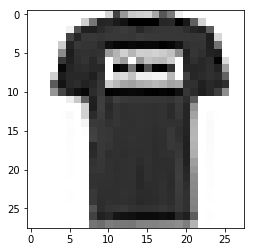

In [4]:
plt.imshow(x_train[1], cmap='binary')

In [5]:
# Size of encoded representation
# 32 floats denotes a compression factor of 24.5 assuming input is 784 float
# we have 32*32 or 1024 floats

encoding_dim = 32

#Input placeholder
input_img = Input(shape=(784,))

#Encoded representation of input image
encoded = Dense(encoding_dim, activation='relu',  activity_regularizer=regularizers.l1(10e-5))(input_img)
                                
# Decode is lossy reconstruction of input              
decoded = Dense(784, activation='sigmoid')(encoded)


# This autoencoder will map input to reconstructed output
autoencoder = Model(input_img, decoded)

In [6]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [7]:
''' The seperate encoder network '''

# Define a model which maps input images to the latent space
encoder_network = Model(input_img, encoded)

# Visualize network
encoder_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
Total params: 25,120
Trainable params: 25,120
Non-trainable params: 0
_________________________________________________________________


In [8]:
''' The seperate decoder network ''' 

# Placeholder to recieve the encoded (32-dimensional) representation as input
encoded_input = Input(shape=(encoding_dim,))

# Decoder layer, retrieved from the aucoencoder model
decoder_layer = autoencoder.layers[-1]

# Define the decoder model, mapping the latent space to the output layer
decoder_network = Model(encoded_input, decoder_layer(encoded_input))

# Visualize network
decoder_network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 25,872
Trainable params: 25,872
Non-trainable params: 0
_________________________________________________________________


In [9]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [10]:
# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten images to 2D arrays
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Print out the shape
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


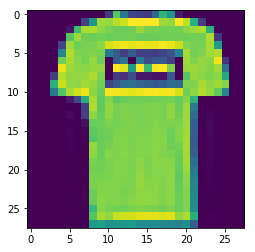

In [11]:
plt.imshow(x_train[1].reshape(28,28))

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 4s 61us/step - loss: 0.5303 - val_loss: 0.4575
Epoch 2/50
60000/60000 [==============================] - 2s 32us/step - loss: 0.4240 - val_loss: 0.4048
Epoch 3/50
60000/60000 [==============================] - 2s 38us/step - loss: 0.3940 - val_loss: 0.3865
Epoch 4/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3768 - val_loss: 0.3709
Epoch 5/50
60000/60000 [==============================] - 2s 40us/step - loss: 0.3629 - val_loss: 0.3588
Epoch 6/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.3520 - val_loss: 0.3491
Epoch 7/50
60000/60000 [==============================] - 3s 43us/step - loss: 0.3433 - val_loss: 0.3414
Epoch 8/50
60000/60000 [==============================] - 3s 42us/step - loss: 0.3364 - val_loss: 0.3354
Epoch 9/50
60000/60000 [==============================] - 2s 41us/step - loss: 0.3310 - val_loss: 0.3307
Epoch

In [13]:
# Time to encode some images

encoded_imgs = encoder_network.predict(x_test)

# Then decode them 
decoded_imgs = decoder_network.predict(encoded_imgs)

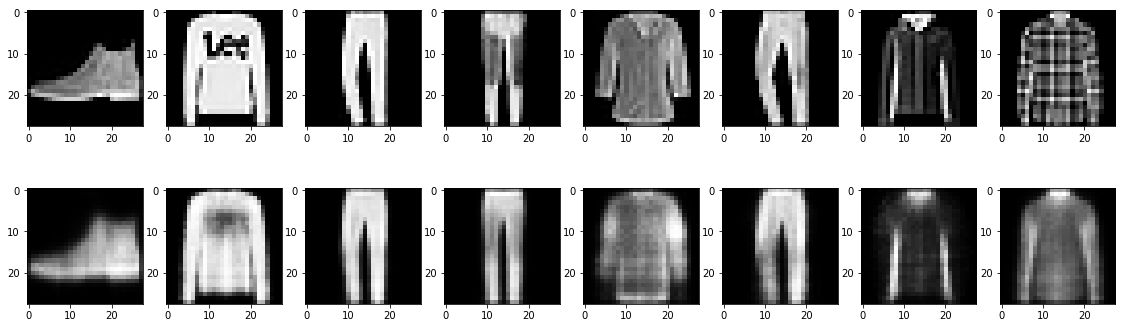

In [29]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt


plt.figure(figsize=(22, 6))

num_imgs = 9

for i in range(n):                        
    # display original
    ax = plt.subplot(2, num_imgs, i + 1)
    true_img = x_test[i].reshape(28, 28)
    plt.imshow(true_img)


    # display reconstruction
    ax = plt.subplot(2, num_imgs, i + 1 + num_imgs)
    reconstructed_img = decoded_imgs[i].reshape(28,28)
    plt.imshow(reconstructed_img)

plt.show()